In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
from datasets import load_dataset

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from wordcloud import WordCloud
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
data = load_dataset("Reyansh4/Fake-News-Classification")

README.md:   0%|          | 0.00/468 [00:00<?, ?B/s]

train.csv:   0%|          | 0.00/98.6M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20800 [00:00<?, ? examples/s]

In [5]:
data

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'author', 'text', 'label'],
        num_rows: 20800
    })
})

In [6]:
data_tr = load_dataset("Reyansh4/Fake-News-Classification", split="train")

data_df = data_tr.to_pandas()

train_data, validation_data = train_test_split(data_df, test_size=0.2, random_state=42)
train_data.head()
#validation_data.head()

,id,title,author,text,label
5933,5933,"Raccoons in Central Park Draw Crowds, and Warn...",Sarah Maslin Nir,"Like a little crew of bandits, the first few...",0
9646,9646,Bolton on Susan Rice Scandal: Obama Needs to B...,John Hayward,"On Thursday’s Breitbart News Daily, SiriusXM h...",0
8642,8642,IF HILLARY CLINTON IS CHARGED WITH OBSTRUCTION...,Iron Sheik,Home › POLITICS › IF HILLARY CLINTON IS CHARGE...,1
15126,15126,New York Times’s Moscow Bureau Was Targeted by...,Nicole Perlroth and David E. Sanger,The New York Times’s Moscow bureau was the tar...,0
3410,3410,Gays Against Sharia March Branded ’Islamophobi...,Donna Rachel Edmunds,An event organised by Gays Against Sharia to m...,0


In [7]:
data_df.shape

(20800, 5)

In [8]:
data_df.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [10]:
data_df.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


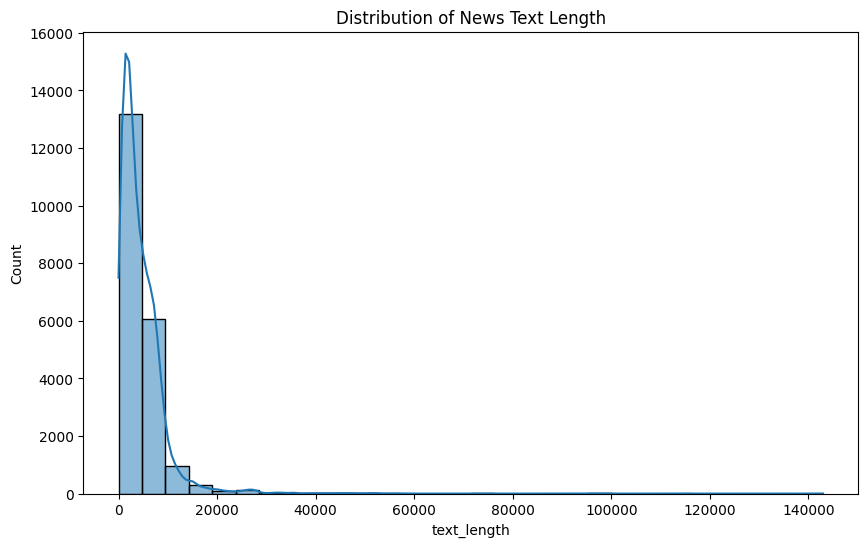

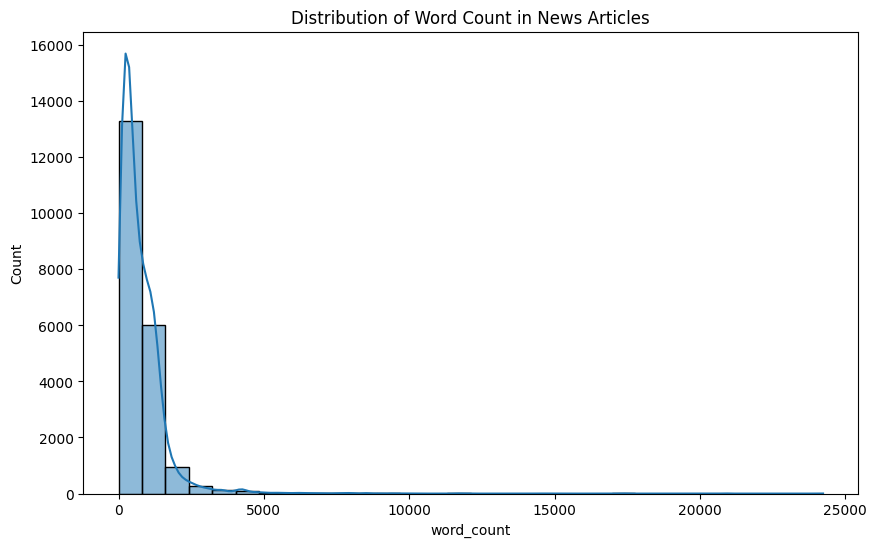

In [11]:
data_df['text'] = data_df['text'].fillna('')

data_df['text_length'] = data_df['text'].apply(len)
data_df['word_count'] = data_df['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
sns.histplot(data_df['text_length'], bins=30, kde=True)
plt.title('Distribution of News Text Length')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data_df['word_count'], bins=30, kde=True)
plt.title('Distribution of Word Count in News Articles')
plt.show()

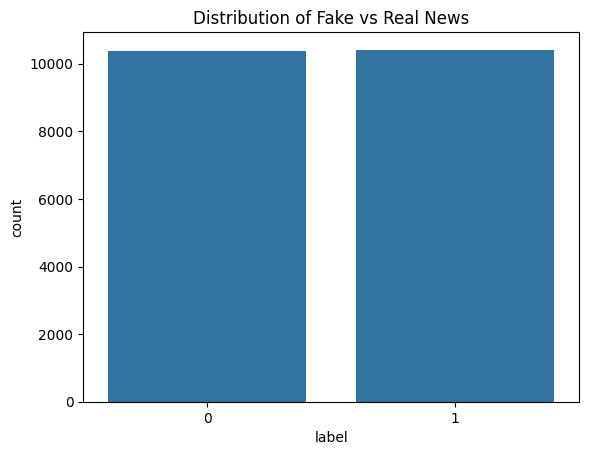

In [12]:
# Visualize the distribution of Fake vs Real news
sns.countplot(x='label', data=data_df)
plt.title('Distribution of Fake vs Real News')
plt.show()

the dataset is quite balanced

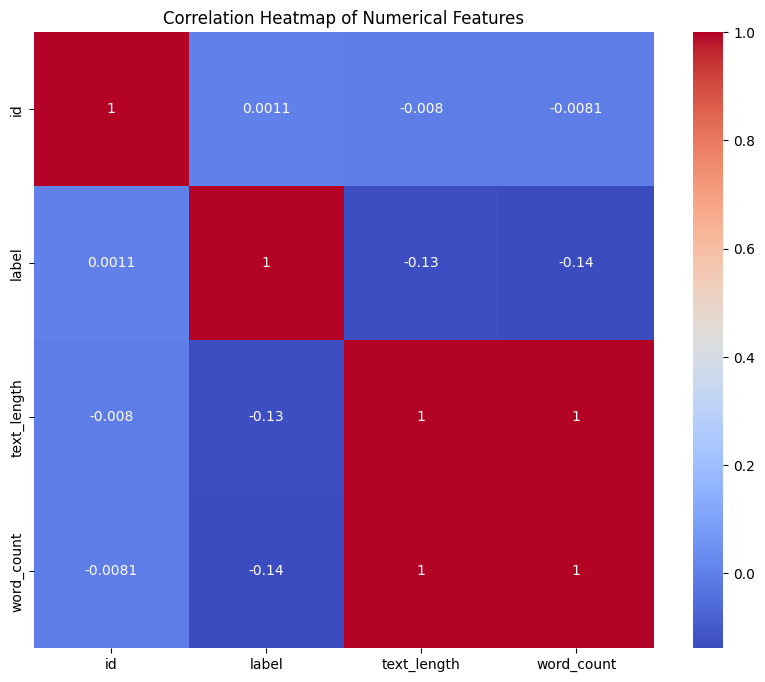

In [13]:
numerical_data = data_df.select_dtypes(include=['float64', 'int64'])



if not numerical_data.empty:

    plt.figure(figsize=(10, 8))
    sns.heatmap(numerical_data.corr().fillna(0), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap of Numerical Features")
    plt.show()
else:
    print("No numerical columns found in the dataset.")


In [14]:
print(data_df['label'].unique())

[1 0]


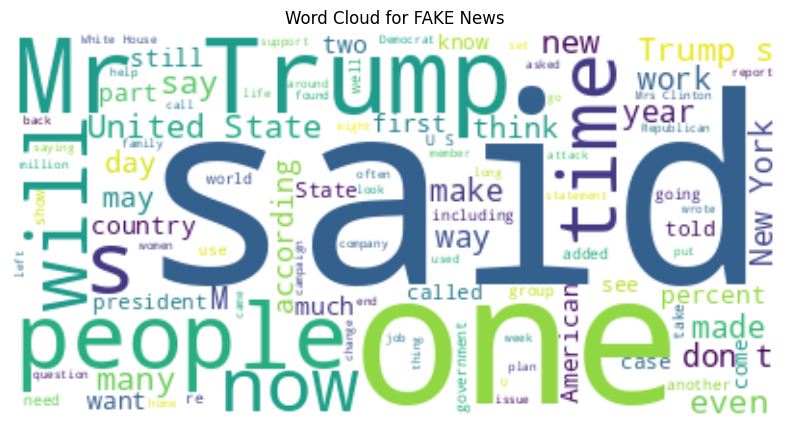

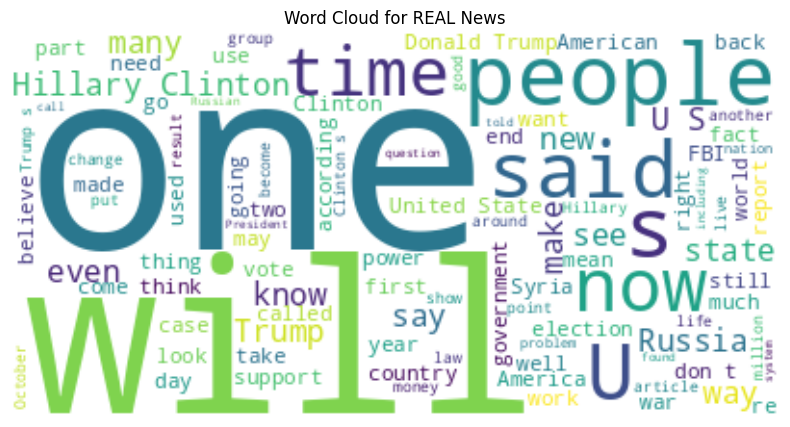

In [15]:
fake_label = 0
real_label = 1


fake_news_text = ' '.join(data_df[data_df['label'] == fake_label]['text'].fillna(''))
if fake_news_text:
    wordcloud_fake = WordCloud(max_words=100, background_color="white").generate(fake_news_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_fake, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud for FAKE News")
    plt.show()
else:
    print("No FAKE news articles found.")

# Generate word cloud for REAL news
real_news_text = ' '.join(data_df[data_df['label'] == real_label]['text'].fillna(''))
if real_news_text:
    wordcloud_real = WordCloud(max_words=100, background_color="white").generate(real_news_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_real, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud for REAL News")
    plt.show()
else:
    print("No REAL news articles found.")

In [16]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

data_df['cleaned_text'] = data_df['text'].apply(clean_text)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(data_df['cleaned_text'])
y = data_df['label']

In [17]:
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Feature matrix shape: (20800, 5000)
Target vector shape: (20800,)


In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data_df['label'])

In [19]:
import gensim
nltk.download('stopwords')

# Define stop words
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Preprocessing function
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
    return ' '.join(result)  # Join tokens as a single string (optional for TF-IDF)

# Example usage
data_df['cleaned_text'] = data_df['text'].apply(preprocess)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression Accuracy: 0.9485576923076923
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2132
           1       0.94      0.95      0.95      2028

    accuracy                           0.95      4160
   macro avg       0.95      0.95      0.95      4160
weighted avg       0.95      0.95      0.95      4160



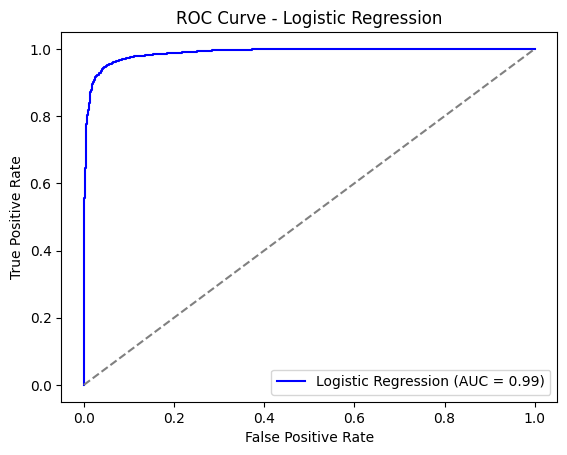

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.savefig("Logistic_Regression_ROC.png")  # Save the image
plt.show()

Random Forest Accuracy: 0.9497596153846154
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2132
           1       0.95      0.94      0.95      2028

    accuracy                           0.95      4160
   macro avg       0.95      0.95      0.95      4160
weighted avg       0.95      0.95      0.95      4160



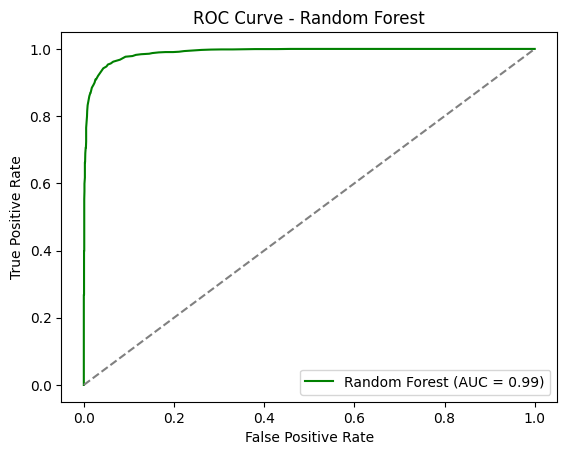

In [22]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='green', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.savefig("Random_Forest_ROC.png")  # Save the image
plt.show()

In [25]:

classification_report_lr = classification_report(y_test, y_pred_lr)
classification_report_rf = classification_report(y_test, y_pred_rf)

print("Logistic Regression Accuracy:", classification_report_lr)
print("Random Forest Accuracy:", classification_report_rf)

# Display the classification reports for each model
print("\nClassification Report - Logistic Regression:\n", classification_report_lr)
print("\nClassification Report - Random Forest:\n", classification_report_rf)


Logistic Regression Accuracy:               precision    recall  f1-score   support

           0       0.96      0.94      0.95      2132
           1       0.94      0.95      0.95      2028

    accuracy                           0.95      4160
   macro avg       0.95      0.95      0.95      4160
weighted avg       0.95      0.95      0.95      4160

Random Forest Accuracy:               precision    recall  f1-score   support

           0       0.95      0.96      0.95      2132
           1       0.95      0.94      0.95      2028

    accuracy                           0.95      4160
   macro avg       0.95      0.95      0.95      4160
weighted avg       0.95      0.95      0.95      4160


Classification Report - Logistic Regression:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      2132
           1       0.94      0.95      0.95      2028

    accuracy                           0.95      4160
   macro avg       0.95    

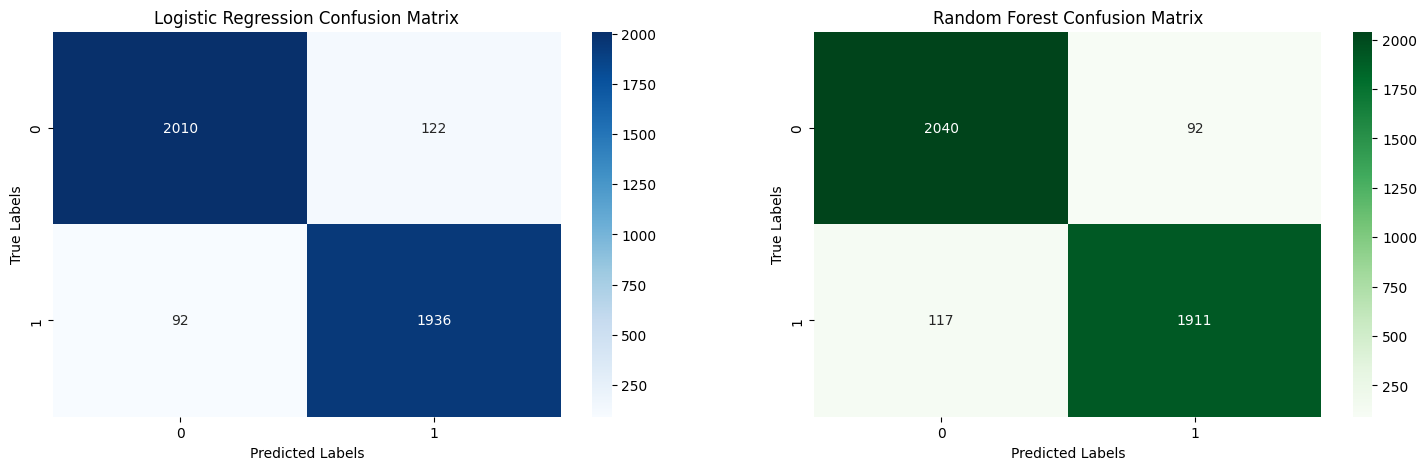

In [27]:
from sklearn.metrics import confusion_matrix
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")

# Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")



plt.show()